In [98]:
# 데이터 정리

from bs4 import BeautifulSoup
import requests
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df_origin = pd.read_excel('./주유소_평균_판매가격_20221212164620.xlsx')
print(df_origin)
print('\n')
df_origin_T = df_origin.transpose()
print(df_origin_T)
print('\n')


grouped = df_origin.groupby(['제품별'])
for key, group in grouped:
    print(type(key), type(group))
    group.set_index(['제품별'], inplace = True)
    group1 = pd.DataFrame(group)
    group_T = group1.T
    print('key:', key)
    print('number:', len(group_T))
    print('group head: \n',group_T)
    print('\n')
    print(group_T.index, group_T.columns)
    print('\n')
    
df = df_origin_T.rename(columns = {'보통휘발유': 'regular gasoline', '실내등유': 'indoor kerosene', '자동차용 경유': 'disel for car '})
df.drop(['제품별'], axis = 0 , inplace = True)
df.rename(columns = {0: '보통휘발유', 1: '실내등유', 2: '자동차용 경유'}, inplace = True)
print(df)






       제품별  2022.01  2022.02  2022.03  2022.04  2022.05  2022.06  2022.07  \
0    보통휘발유  1635.22  1714.61  1938.46  1976.53  1967.07  2084.00  2029.99   
1     실내등유  1098.10  1171.44  1347.82  1427.82  1480.11  1601.77  1686.55   
2  자동차용 경유  1453.53  1536.64  1826.93  1906.42  1964.28  2089.03  2084.91   

   2022.08  2022.09  2022.10  2022.11  
0  1792.19  1730.00  1666.65  1650.32  
1  1639.49  1620.15  1598.07  1601.69  
2  1889.31  1850.20  1838.34  1879.15  


               0        1        2
제품별        보통휘발유     실내등유  자동차용 경유
2022.01  1635.22   1098.1  1453.53
2022.02  1714.61  1171.44  1536.64
2022.03  1938.46  1347.82  1826.93
2022.04  1976.53  1427.82  1906.42
2022.05  1967.07  1480.11  1964.28
2022.06   2084.0  1601.77  2089.03
2022.07  2029.99  1686.55  2084.91
2022.08  1792.19  1639.49  1889.31
2022.09   1730.0  1620.15   1850.2
2022.10  1666.65  1598.07  1838.34
2022.11  1650.32  1601.69  1879.15


<class 'str'> <class 'pandas.core.frame.DataFrame'>
key: 보통휘발유
number: 1

c:\Users\82106\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [97]:
# gropued 정보
print(grouped.describe())
print('\n')
print(grouped.size())

        2022.01                                                            \
          count     mean std      min      25%      50%      75%      max   
제품별                                                                         
보통휘발유       1.0  1635.22 NaN  1635.22  1635.22  1635.22  1635.22  1635.22   
실내등유        1.0  1098.10 NaN  1098.10  1098.10  1098.10  1098.10  1098.10   
자동차용 경유     1.0  1453.53 NaN  1453.53  1453.53  1453.53  1453.53  1453.53   

        2022.02           ...  2022.10          2022.11                        \
          count     mean  ...      75%      max   count     mean std      min   
제품별                       ...                                                   
보통휘발유       1.0  1714.61  ...  1666.65  1666.65     1.0  1650.32 NaN  1650.32   
실내등유        1.0  1171.44  ...  1598.07  1598.07     1.0  1601.69 NaN  1601.69   
자동차용 경유     1.0  1536.64  ...  1838.34  1838.34     1.0  1879.15 NaN  1879.15   

                                             
    

In [94]:
# 환율을 이용하여 dollar 로 바꿈 (2022. 12. 14 기준 환율)
def won_to_dollar(x):
    return x*0.00077

print(grouped.agg(won_to_dollar))


          2022.01   2022.02   2022.03   2022.04   2022.05   2022.06   2022.07  \
제품별                                                                             
보통휘발유    1.259119  1.320250  1.492614  1.521928  1.514644  1.604680  1.563092   
실내등유     0.845537  0.902009  1.037821  1.099421  1.139685  1.233363  1.298643   
자동차용 경유  1.119218  1.183213  1.406736  1.467943  1.512496  1.608553  1.605381   

          2022.08   2022.09   2022.10   2022.11  
제품별                                              
보통휘발유    1.379986  1.332100  1.283321  1.270746  
실내등유     1.262407  1.247515  1.230514  1.233301  
자동차용 경유  1.454769  1.424654  1.415522  1.446945  


     제품별  2022.01  2022.02  2022.03  2022.04  2022.05  2022.06  2022.07  \
0  보통휘발유  1635.22  1714.61  1938.46  1976.53  1967.07   2084.0  2029.99   

   2022.08  2022.09  2022.10  2022.11  
0  1792.19   1730.0  1666.65  1650.32  


      month      Won
1   2022.01  1635.22
2   2022.02  1714.61
3   2022.03  1938.46
4   2022.04  1976.53
5   2022.05  1967.07
6   2022.06   2084.0
7   2022.07  2029.99
8   2022.08  1792.19
9   2022.09   1730.0
10  2022.10  1666.65
11  2022.11  1650.32
RangeIndex(start=1, stop=12, step=1) Index(['month', 'Won'], dtype='object')


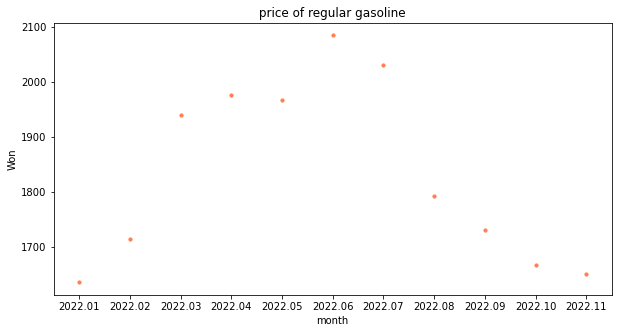

      month
4   2022.04
2   2022.02
1   2022.01
5   2022.05
10  2022.10 
       month
3   2022.03
7   2022.07
9   2022.09
6   2022.06
8   2022.08
11  2022.11 
 4     1976.53
2     1714.61
1     1635.22
5     1967.07
10    1666.65
Name: Won, dtype: object 
 3     1938.46
7     2029.99
9      1730.0
6      2084.0
8     1792.19
11    1650.32
Name: Won, dtype: object
[[1.00000000e+00 2.02204000e+03 4.08864576e+06]
 [1.00000000e+00 2.02202000e+03 4.08856488e+06]
 [1.00000000e+00 2.02201000e+03 4.08852444e+06]
 [1.00000000e+00 2.02205000e+03 4.08868620e+06]
 [1.00000000e+00 2.02210000e+03 4.08888841e+06]]
      month      Won
3   2022.03  1938.46
7   2022.07  2029.99
9   2022.09   1730.0
6   2022.06   2084.0
8   2022.08  1792.19
11  2022.11  1650.32
      month      Won
4   2022.04  1976.53
2   2022.02  1714.61
1   2022.01  1635.22
5   2022.05  1967.07
10  2022.10  1666.65
      month          Won
3   2022.03  1866.344482
7   2022.07  1959.404419
9   2022.09  1799.032471
6   2022.06  1987.86

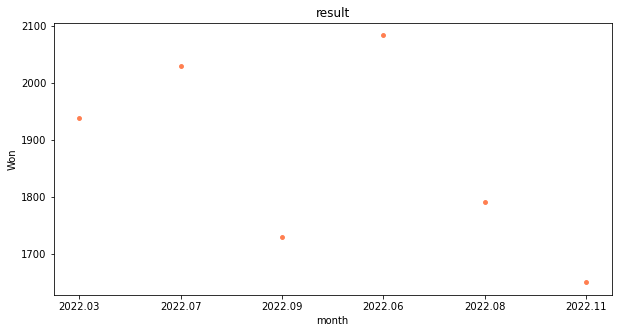

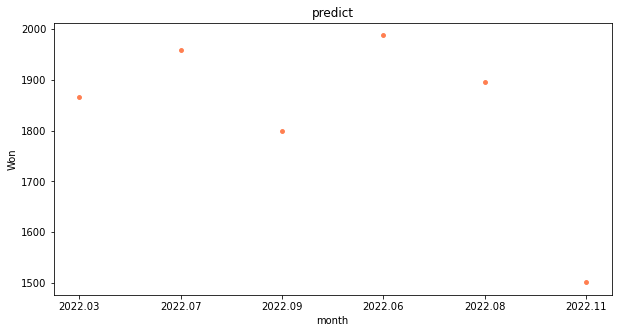

In [153]:
# 보통휘발유 

re_gas = grouped.get_group('보통휘발유')
print(re_gas)
print('\n')

re_gas_T = re_gas.T
new_re_gas = re_gas_T.reset_index()
new_re_gas.rename(columns = {'index': 'month', 0 : 'Won'}, inplace = True)
new_re_gas.drop(0, inplace = True)

print(new_re_gas)
print(new_re_gas.index, new_re_gas.columns)

new_re_gas.plot(kind = 'scatter', x = 'month', y = 'Won', c = 'coral' , s= 10, figsize = (10, 5), title = ' price of regular gasoline ')
plt.show()
plt.close()


      month
6   2022.06
8   2022.08
11  2022.11
4   2022.04
2   2022.02
1   2022.01
5   2022.05
10  2022.10 
      month
3  2022.03
7  2022.07
9  2022.09 
 6      2084.0
8     1792.19
11    1650.32
4     1976.53
2     1714.61
1     1635.22
5     1967.07
10    1666.65
Name: Won, dtype: object 
 3    1938.46
7    2029.99
9     1730.0
Name: Won, dtype: object
[[1.00000000e+00 2.02206000e+03 4.08872664e+06]
 [1.00000000e+00 2.02208000e+03 4.08880753e+06]
 [1.00000000e+00 2.02211000e+03 4.08892885e+06]
 [1.00000000e+00 2.02204000e+03 4.08864576e+06]
 [1.00000000e+00 2.02202000e+03 4.08856488e+06]
 [1.00000000e+00 2.02201000e+03 4.08852444e+06]
 [1.00000000e+00 2.02205000e+03 4.08868620e+06]
 [1.00000000e+00 2.02210000e+03 4.08888841e+06]]
     month      Won
3  2022.03  1938.46
7  2022.07  2029.99
9  2022.09   1730.0
      month      Won
6   2022.06   2084.0
8   2022.08  1792.19
11  2022.11  1650.32
4   2022.04  1976.53
2   2022.02  1714.61
1   2022.01  1635.22
5   2022.05  1967.07
10  2022

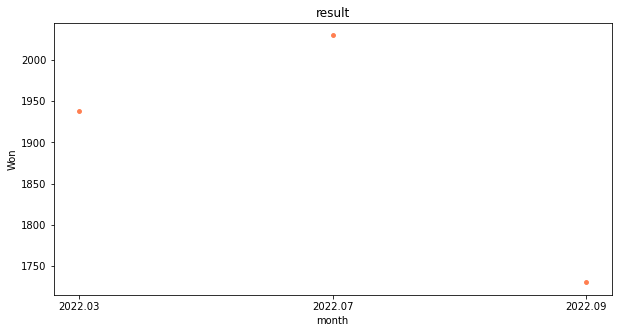

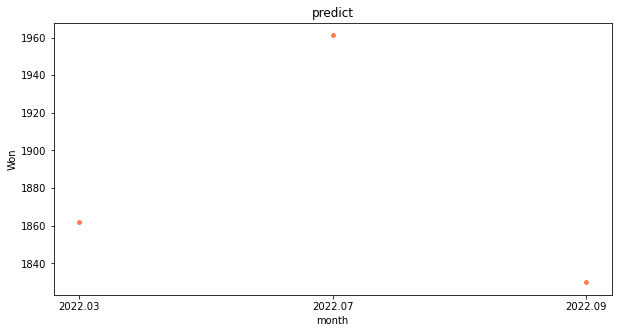

In [168]:
# 보통 휘발유 다항회귀

X = new_re_gas[['month']]
y = new_re_gas['Won']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

print(X_train, '\n',X_test,'\n',y_train,'\n',y_test)

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 2)
X_train_poly = poly.fit_transform(X_train)
print(X_train_poly)

pr = LinearRegression()
pr.fit(X_train_poly, y_train)

X_test_Poly = poly.fit_transform(X_test)

y_hat_test = pr.predict(X_test_Poly)
df_y_hat_test = pd.DataFrame({'Won': y_hat_test})
df_y_hat_test.index = y_test.index

df_test = pd.concat([X_test, df_y_hat_test], axis = 1)
df_train = pd.concat([X_train, y_train], axis = 1)
df_real = pd.concat([X_test, y_test], axis = 1)
print(df_real)
print(df_train)
print(df_test)

df_real.plot(kind = 'scatter', x = 'month', y = 'Won', c= 'coral', s = 15, figsize = (10, 5), title = 'result')
df_test.plot(kind = 'scatter', x = 'month', y = 'Won', c= 'coral', s = 15, figsize = (10, 5), title = 'predict')

plt.show()
plt.close()

In [172]:
# 모델 평가

def MSE(x, y):
    sum = 0
    x_list = []
    y_list = []
    for i in x.Won:
        x_list.append(i)
        
    for i in y.Won:
        y_list.append(i)
        
    print(x_list, y_list)
    for i in range(3):
        sum += (x_list[i] - y_list[i])**2
        print(x_list[i]-y_list[i])
        print(sum)
        
    return sum/3

sum = 0 
for i in range(10):
    sum += MSE(df_real, df_test)

print(sum/10)

[1938.46, 2029.99, 1730.0] [1861.94970703125, 1961.1396484375, 1829.9312744140625]
76.51029296875004
5853.824930163962
68.85035156250001
10594.195840443808
-99.9312744140625
20580.45544646247
[1938.46, 2029.99, 1730.0] [1861.94970703125, 1961.1396484375, 1829.9312744140625]
76.51029296875004
5853.824930163962
68.85035156250001
10594.195840443808
-99.9312744140625
20580.45544646247
[1938.46, 2029.99, 1730.0] [1861.94970703125, 1961.1396484375, 1829.9312744140625]
76.51029296875004
5853.824930163962
68.85035156250001
10594.195840443808
-99.9312744140625
20580.45544646247
[1938.46, 2029.99, 1730.0] [1861.94970703125, 1961.1396484375, 1829.9312744140625]
76.51029296875004
5853.824930163962
68.85035156250001
10594.195840443808
-99.9312744140625
20580.45544646247
[1938.46, 2029.99, 1730.0] [1861.94970703125, 1961.1396484375, 1829.9312744140625]
76.51029296875004
5853.824930163962
68.85035156250001
10594.195840443808
-99.9312744140625
20580.45544646247
[1938.46, 2029.99, 1730.0] [1861.9497070

    제품별  2022.01  2022.02  2022.03  2022.04  2022.05  2022.06  2022.07  \
1  실내등유   1098.1  1171.44  1347.82  1427.82  1480.11  1601.77  1686.55   

   2022.08  2022.09  2022.10  2022.11  
1  1639.49  1620.15  1598.07  1601.69  


      month      Won
1   2022.01   1098.1
2   2022.02  1171.44
3   2022.03  1347.82
4   2022.04  1427.82
5   2022.05  1480.11
6   2022.06  1601.77
7   2022.07  1686.55
8   2022.08  1639.49
9   2022.09  1620.15
10  2022.10  1598.07
11  2022.11  1601.69


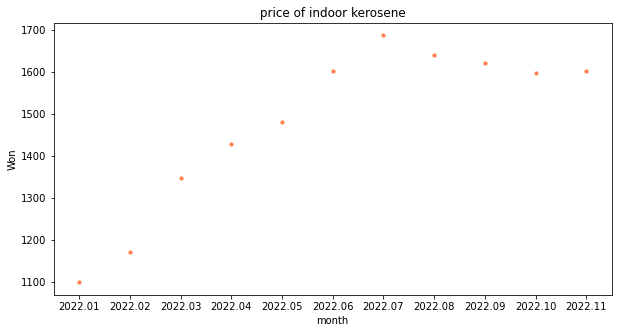

In [99]:
# 실내등유

in_kero = grouped.get_group('실내등유')
print(in_kero)
print('\n')

in_kero_T = in_kero.T
new_in_kero = in_kero_T.reset_index()
new_in_kero.drop(0, inplace = True)
new_in_kero.rename(columns = {'index': 'month', 1 : 'Won'}, inplace = True)

print(new_in_kero)

new_in_kero.plot(kind = 'scatter', x = 'month', y = 'Won', c = 'coral' , s= 10, figsize = (10, 5), title = ' price of indoor kerosene ')

plt.show()
plt.close()



      month      Won
1   2022.01  1453.53
2   2022.02  1536.64
3   2022.03  1826.93
4   2022.04  1906.42
5   2022.05  1964.28
6   2022.06  2089.03
7   2022.07  2084.91
8   2022.08  1889.31
9   2022.09   1850.2
10  2022.10  1838.34
11  2022.11  1879.15


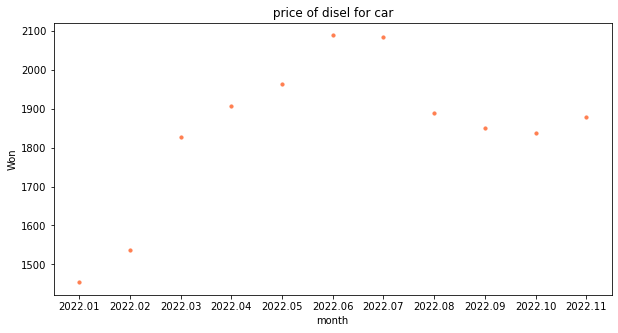

In [101]:
# 자동차용 경유

disel = grouped.get_group('자동차용 경유')
disel_T = disel.T
new_disel = disel_T.reset_index()
new_disel.drop(0, inplace = True)
new_disel.rename(columns = {'index': 'month', 2 : 'Won'}, inplace = True)

print(new_disel)

new_disel.plot(kind = 'scatter', x = 'month', y = 'Won', c = 'coral' , s= 10, figsize = (10, 5), title = ' price of disel for car ')
plt.show()
plt.close()

      month      Won
1   2022.01  1635.22
2   2022.02  1714.61
3   2022.03  1938.46
4   2022.04  1976.53
5   2022.05  1967.07
6   2022.06   2084.0
7   2022.07  2029.99
8   2022.08  1792.19
9   2022.09   1730.0
10  2022.10  1666.65
11  2022.11  1650.32


[None, None, 1938.46, 1976.53, 1967.07, 2084.0, 2029.99, None, None, None, None] [1635.22, 1714.61, None, None, None, None, None, 1792.19, 1730.0, 1666.65, 1650.32]
    over 1900  under 1900
0         NaN     1635.22
1         NaN     1714.61
2     1938.46         NaN
3     1976.53         NaN
4     1967.07         NaN
5     2084.00         NaN
6     2029.99         NaN
7         NaN     1792.19
8         NaN     1730.00
9         NaN     1666.65
10        NaN     1650.32
            count
over 1900       5
under 1900      6


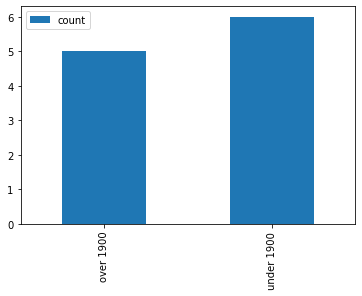

In [84]:
# 보통 휘발유 1900 이상 미만 구분

print(new_re_gas)

plt.show()
plt.close()
print('\n')
list_over_1900 = []
list_under_1900 = []
for x in new_re_gas['Won']:
    if x >= 1900:
        list_over_1900.append(x)
    
    if x < 1900:
        list_under_1900.append(x)
        
    while (len(list_over_1900) != len(list_under_1900)):
        
        if len(list_over_1900) > len(list_under_1900):
            list_under_1900.append(None)
            
        if (len(list_over_1900) < len(list_under_1900)):
            list_over_1900.append(None)
        
        
print(list_over_1900, list_under_1900)
df_divide_re_gas = pd.DataFrame({'over 1900': list_over_1900, 'under 1900': list_under_1900})

print(df_divide_re_gas)

df_second_regas = pd.DataFrame([5, 6])
df_second_regas.rename(index = {0:'over 1900', 1: 'under 1900'}, inplace = True)
df_second_regas.rename(columns = {0:'count'}, inplace = True)
print(df_second_regas)

df_second_regas.plot(kind = 'bar')
plt.show()
plt.close()

